# Decision tree regressor

## Load California Housing dataset

In [1]:
from sklearn.datasets import fetch_california_housing

In [2]:
cali_prices = fetch_california_housing()
X_reg = cali_prices.data
y_reg = cali_prices.target

print(X_reg.shape)
print(y_reg.shape)

(20640, 8)
(20640,)


In [3]:
print(cali_prices.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(X_reg[0])

[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]


In [5]:
print(y_reg)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


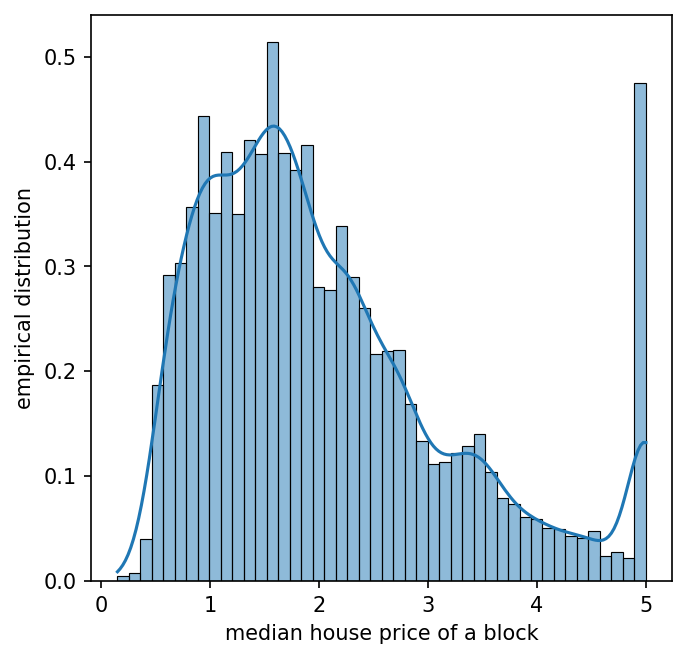

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5),dpi=150)
sns.histplot(y_reg, kde=True, stat='density')
plt.xlabel('median house price of a block')
plt.ylabel('empirical distribution')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [7]:
# train-test data split
X_train,X_test,y_train,y_test = train_test_split(X_reg,y_reg,test_size=0.01)

tree_reg = DecisionTreeRegressor(max_depth=4)
# training
tree_reg.fit(X_train, y_train)

# evaluation (R2 score)
test_performance = tree_reg.score(X_test,y_test)
print(test_performance)

0.586918467046906


[Text(0.5, 0.9, 'X[0] <= 5.075\nsquared_error = 1.332\nsamples = 20433\nvalue = 2.069'),
 Text(0.25, 0.7, 'X[0] <= 3.074\nsquared_error = 0.843\nsamples = 16217\nvalue = 1.742'),
 Text(0.125, 0.5, 'X[2] <= 4.314\nsquared_error = 0.563\nsamples = 7784\nvalue = 1.357'),
 Text(0.0625, 0.3, 'X[0] <= 2.215\nsquared_error = 0.673\nsamples = 3282\nvalue = 1.622'),
 Text(0.03125, 0.1, 'squared_error = 0.573\nsamples = 1731\nvalue = 1.374'),
 Text(0.09375, 0.1, 'squared_error = 0.638\nsamples = 1551\nvalue = 1.899'),
 Text(0.1875, 0.3, 'X[0] <= 2.414\nsquared_error = 0.395\nsamples = 4502\nvalue = 1.164'),
 Text(0.15625, 0.1, 'squared_error = 0.284\nsamples = 2263\nvalue = 0.966'),
 Text(0.21875, 0.1, 'squared_error = 0.428\nsamples = 2239\nvalue = 1.364'),
 Text(0.375, 0.5, 'X[5] <= 2.373\nsquared_error = 0.839\nsamples = 8433\nvalue = 2.097'),
 Text(0.3125, 0.3, 'X[1] <= 19.5\nsquared_error = 1.294\nsamples = 1958\nvalue = 2.803'),
 Text(0.28125, 0.1, 'squared_error = 0.706\nsamples = 539\nva

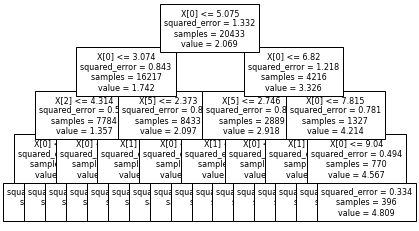

In [8]:
from sklearn.tree import plot_tree


plot_tree(tree_reg, fontsize=8)
#plot_tree.figure(figsize=(4, 4), dpi=150)


In [9]:
feature_importances_cali = tree_reg.feature_importances_
print(feature_importances_cali)

[0.83170096 0.03261671 0.02510698 0.         0.         0.11057535
 0.         0.        ]


<BarContainer object of 8 artists>

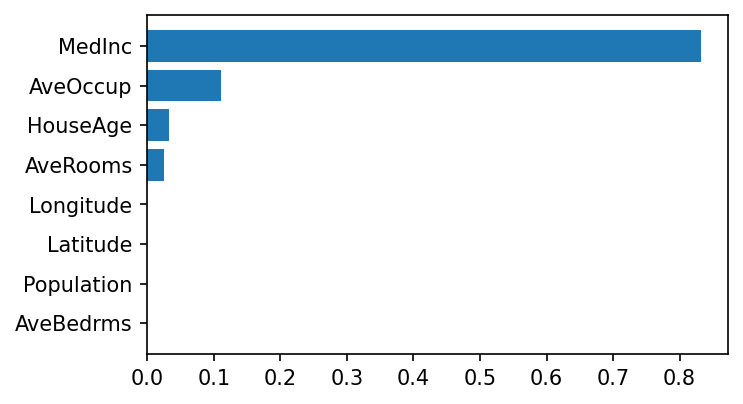

In [10]:
import matplotlib.pyplot as plt
import numpy as np


sorted_idx = tree_reg.feature_importances_.argsort()
plt.figure(figsize=(5,3),dpi=150)
plt.barh(np.asarray(cali_prices.feature_names)[sorted_idx],
         feature_importances_cali[sorted_idx])


#sorted_idx = tree_reg.feature_importances_.argsort()[::-1]
#plt.barh(np.asarray(cali_prices.feature_names)[sorted_idx][::-1],
#         feature_importances_cali[sorted_idx][::-1])

## MSE performance

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
y_pred_train = tree_reg.predict(X_train)
y_pred_test = tree_reg.predict(X_test)
#mse_train = np.mean((y_pred_train - y_train) ** 2)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
print(mse_train)
print(mse_test)

0.5548722950891893
0.540480304448986


## Comparison with random guess performance

In [13]:
random_guess_train = np.random.normal(
                    loc = np.mean(y_train), 
                    scale = np.std(y_train),
                    size =  y_train.shape[0])
random_guess_test = np.random.normal(
                    loc = np.mean(y_test),
                    scale = np.std(y_test),
                    size = y_test.shape[0])
mse_first_train = mean_squared_error(random_guess_train, y_train)
mse_first_test = mean_squared_error(random_guess_test, y_test)
print(mse_first_train)
print(mse_first_test)

2.6748549070685073
2.67179587025698
